In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_excel('data_mlr.xlsx',sheet_name="data")
df

,gold,fuel,food
0,60,22,140
1,62,25,155
2,67,24,159
3,70,20,179
4,71,15,192
5,72,14,200
6,75,14,212
7,78,11,215


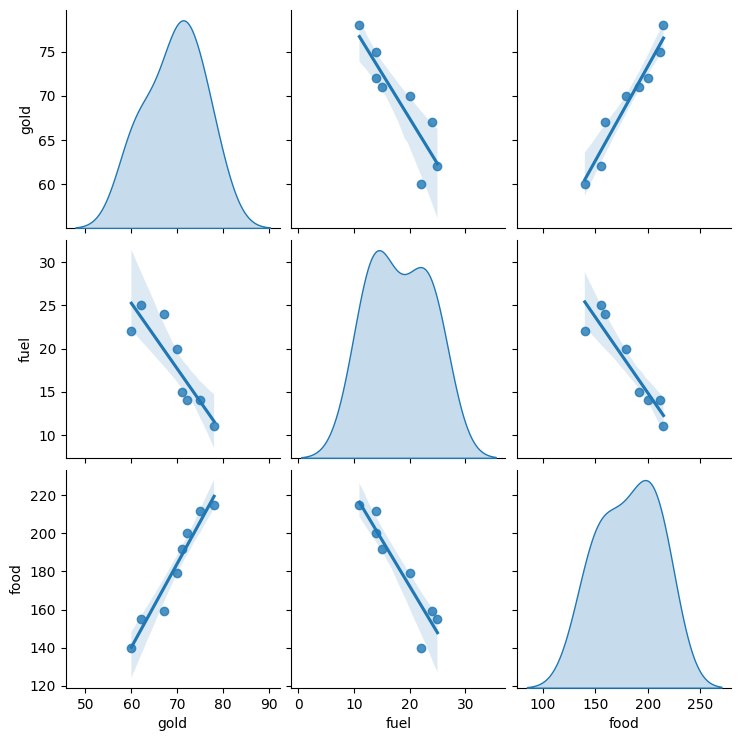

In [19]:
sns.pairplot(df[['gold','fuel','food']], 
             diag_kind='kde', kind='reg')
plt.show()

In [20]:
# Tập dữ liệu Input (đặc trưng) và Output (mục tiêu)
X = df[['gold','fuel']].values # explanatory = feature
y = df[['food']].values # reponse = target

In [21]:
# Đảm bảo dữ liệu là kiểu số thực
X = X.astype(float)
y = y.astype(float)

In [22]:
# Cross Validation
# Chia tách ra training (huấn luyện) và testing (kiểm thử)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, 
                                                    random_state=16)

In [23]:
X_train

array([[72., 14.],
       [78., 11.],
       [75., 14.],
       [62., 25.]])

In [24]:
y_train

array([[200.],
       [215.],
       [212.],
       [155.]])

In [25]:
X_test

array([[67., 24.],
       [71., 15.],
       [60., 22.],
       [70., 20.]])

In [26]:
y_test

array([[159.],
       [192.],
       [140.],
       [179.]])

In [27]:
# Xây dựng mô hình hồi quy tuyến tính đơn biến: ProfitRate = f(TimeAds)
# ProfitRate = A0 + A1*TimeAds + epsilon
from sklearn import linear_model 

In [28]:
# Khai báo mô hình SLR
model = linear_model.LinearRegression()

In [29]:
# Huấn luyện mô hình 
model.fit(X_train,y_train)

LinearRegression()

In [30]:
import numpy as np
from sklearn import metrics

# Tính giá trị dự báo ProfitRate dựa trên dữ liệu TimeAds của tập test
y_test_pred = model.predict(X_test)

print('Score or R-Squared:', model.score(X_test, y_test))

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error:', 
      metrics.mean_absolute_percentage_error(y_test, y_test_pred))

Score or R-Squared: 0.727527455911011
Mean Absolute Error: 9.071942446043153
Root Mean Squared Error: 10.311760777419536
Mean Absolute Percentage Error: 0.05851499177188531


In [31]:
y_test_pred

array([[170.90647482],
       [195.03597122],
       [155.49640288],
       [184.84892086]])

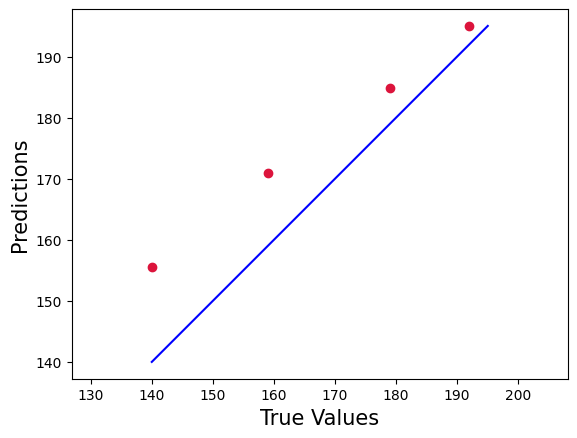

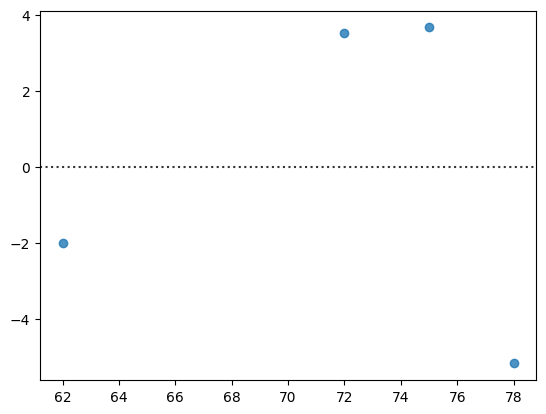

In [33]:
y_test_pred = model.predict(X_test)

plt.scatter(y_test, y_test_pred, c='crimson')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


# (Train data set) Vẽ residual bằng Python
#ve dac trung theo gold 0 = gold, 1 = fuel
sns.residplot(x=X_train[:,0], y=y_train)
plt.show()

In [17]:
# Lưu trữ mô hình đã huấn luyện xuống ổ đĩa
import pickle
pickle.dump(model, open('model_linear_regression.sav', 'wb'))


import pickle
#Load model từ storage
loaded_model = pickle.load(open('model_linear_regression.sav', 'rb'))

vTimeAds = float(input('Nhập thời lượng quảng cáo: '))

predicted_ProfitRate = loaded_model.predict([[vTimeAds]])

print(f'Dự báo điểm ProfitRate là: {predicted_ProfitRate}')

Dự báo điểm ProfitRate là: [[4.66028708]]
